<a href="https://colab.research.google.com/github/lathu-24/Machine-Learning/blob/main/2506728_20241682_lathusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [119]:
# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [120]:
# Shape of the dataset
df.shape


(7043, 21)

In [121]:
# Replace blanks with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows where TotalCharges is missing
df.dropna(subset=["TotalCharges"], inplace=True)

df.reset_index(drop=True, inplace=True)

In [122]:

df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [123]:
df.info()

# Quick statistical summary (numerical features only)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [124]:
# Check missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [125]:
# Convert the target variable 'Churn' from categorical (Yes/No) to numeric (1/0)
# This is required because machine learning models cannot work with string labels.
df['Churn'] = df['Churn'].map({"No": 0, "Yes": 1})

# Display the distribution of the target classes
# This helps check class imbalance before applying SMOTE.
print(df["Churn"].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


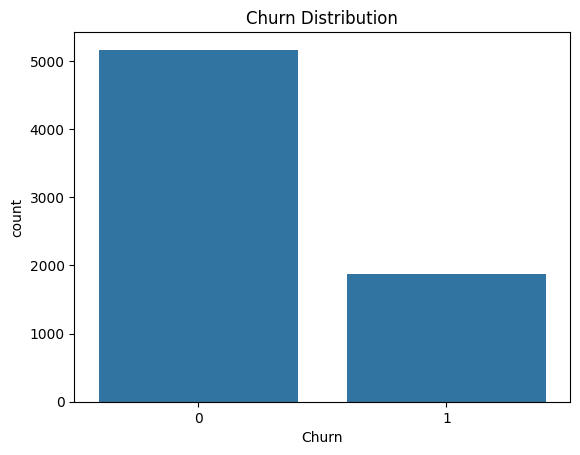

In [126]:
# Plot the distribution of the target variable 'Churn'
# This helps visualize class imbalance in the dataset.
sns.countplot(x=df["Churn"])

# Add a title for clarity
plt.title("Churn Distribution")

# Display the plot
plt.show()

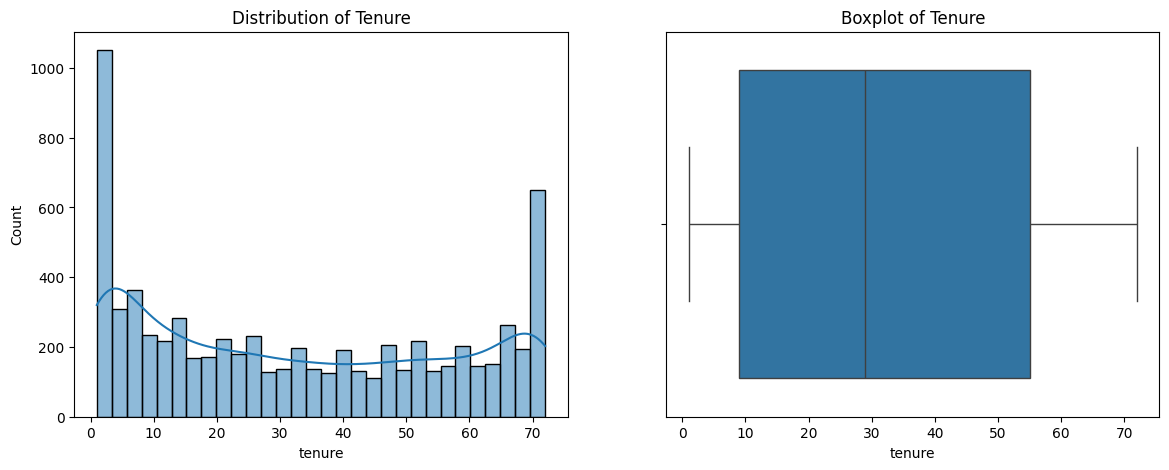

In [127]:
# Visualize the distribution and outliers of the 'tenure' variable
plt.figure(figsize=(14, 5))

# Histogram + KDE to understand the frequency distribution of tenure
plt.subplot(1, 2, 1)
sns.histplot(df["tenure"], kde=True, bins=30)
plt.title("Distribution of Tenure")

# Boxplot to detect potential outliers in tenure
plt.subplot(1, 2, 2)
sns.boxplot(x=df["tenure"])
plt.title("Boxplot of Tenure")

# Display both plots
plt.show()

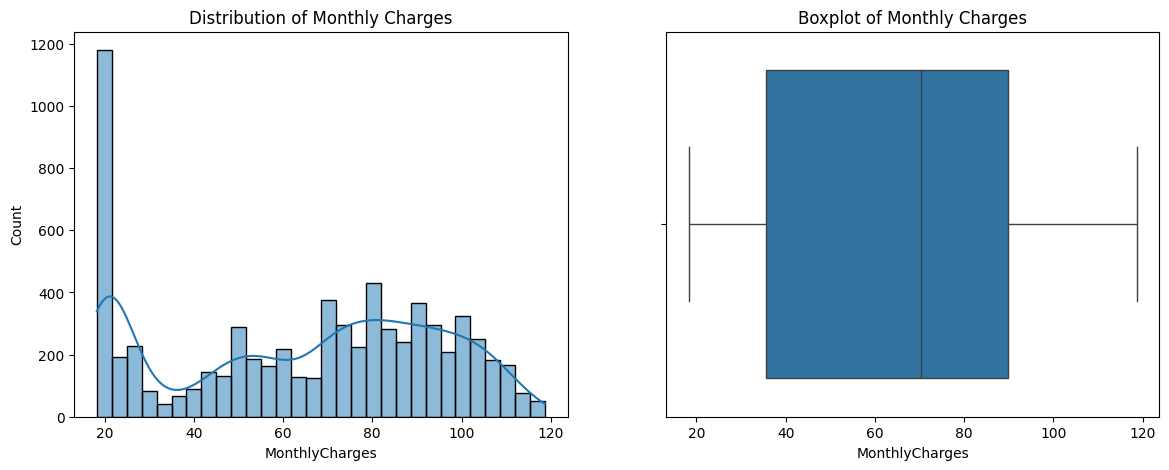

In [128]:
# Visualize the distribution and outliers of the 'MonthlyCharges' variable
plt.figure(figsize=(14, 5))

# Histogram + KDE to analyze how monthly charges are distributed
plt.subplot(1, 2, 1)
sns.histplot(df["MonthlyCharges"], kde=True, bins=30)
plt.title("Distribution of Monthly Charges")

# Boxplot to detect any potential outliers in monthly charges
plt.subplot(1, 2, 2)
sns.boxplot(x=df["MonthlyCharges"])
plt.title("Boxplot of Monthly Charges")

# Display the visualizations
plt.show()

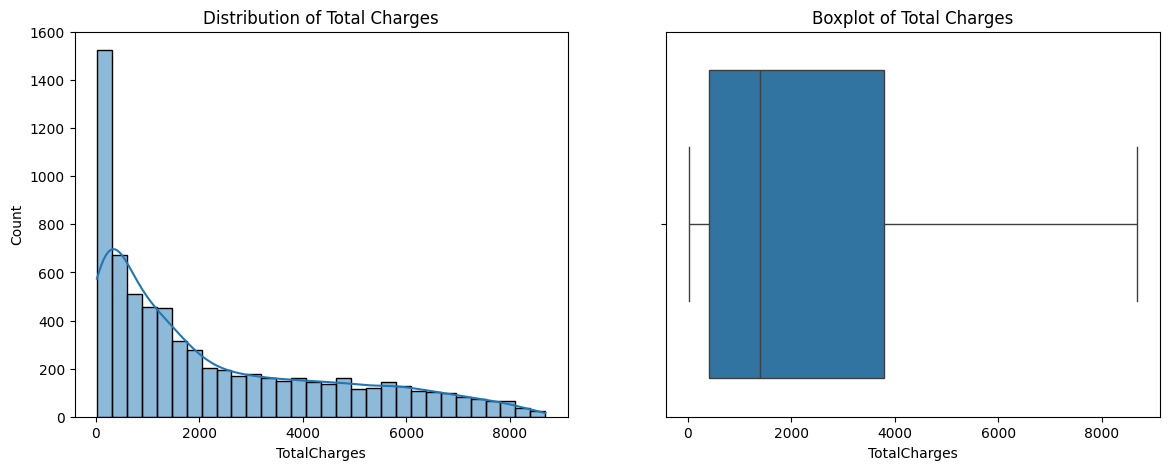

In [129]:
# Visualize the distribution and outliers of the 'TotalCharges' variable
plt.figure(figsize=(14, 5))

# Histogram + KDE to examine how total charges are distributed
plt.subplot(1, 2, 1)
sns.histplot(df["TotalCharges"], kde=True, bins=30)
plt.title("Distribution of Total Charges")

# Boxplot to identify any potential outliers in total charges
plt.subplot(1, 2, 2)
sns.boxplot(x=df["TotalCharges"])
plt.title("Boxplot of Total Charges")

# Display both visualizations
plt.show()

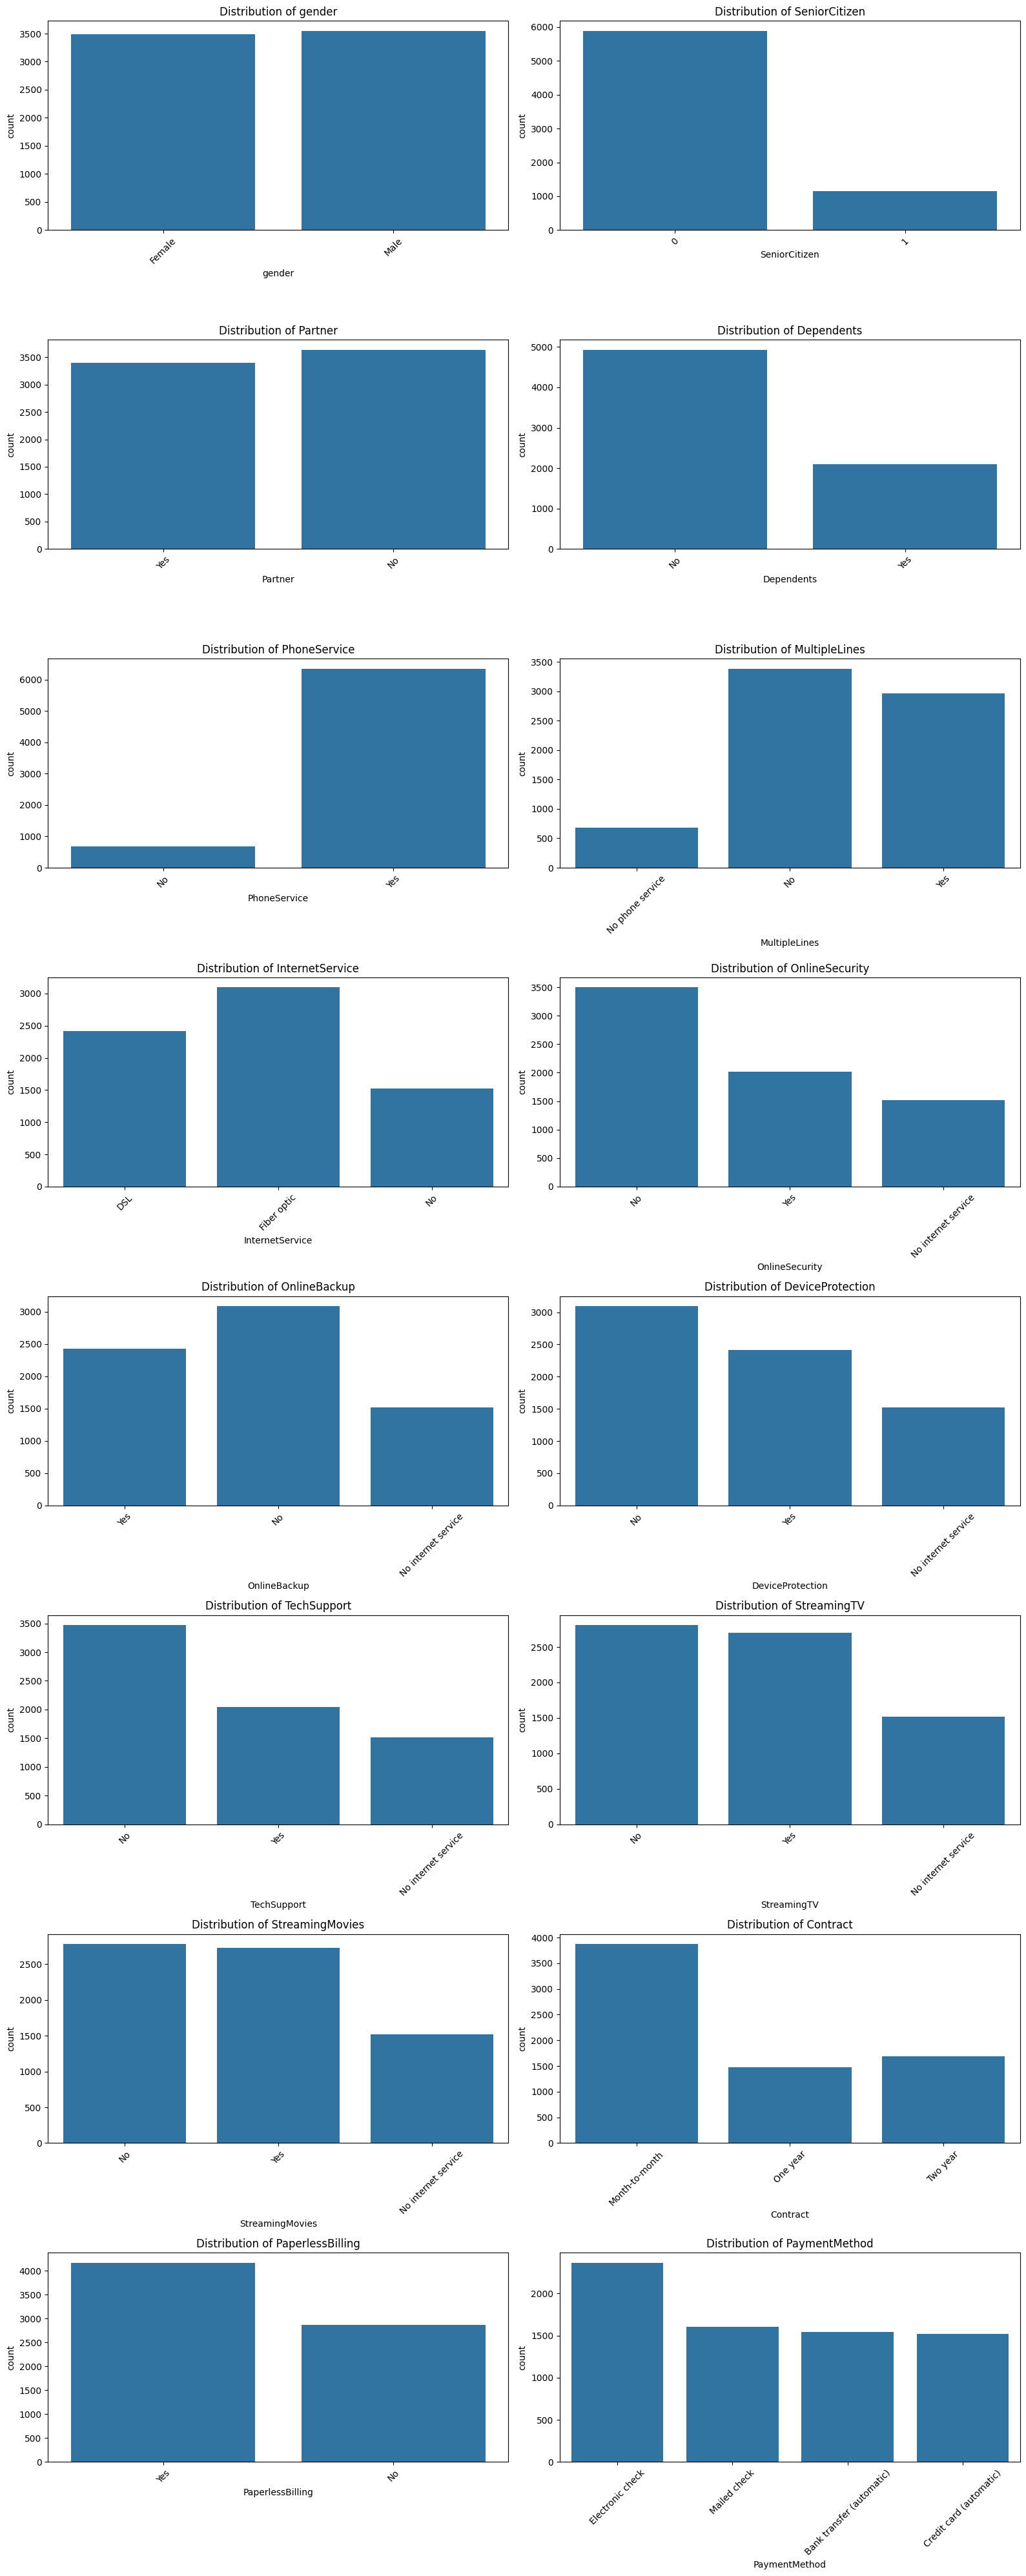

In [130]:
# List of categorical columns to visualize
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Create a large figure to display multiple subplots clearly
plt.figure(figsize=(16, 40))

# Loop through each categorical column and plot its distribution
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)  # Arrange plots in an 8x2 grid
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  # Rotate labels for readability

# Adjust spacing to prevent overlapping
plt.tight_layout()

# Display all plots
plt.show()

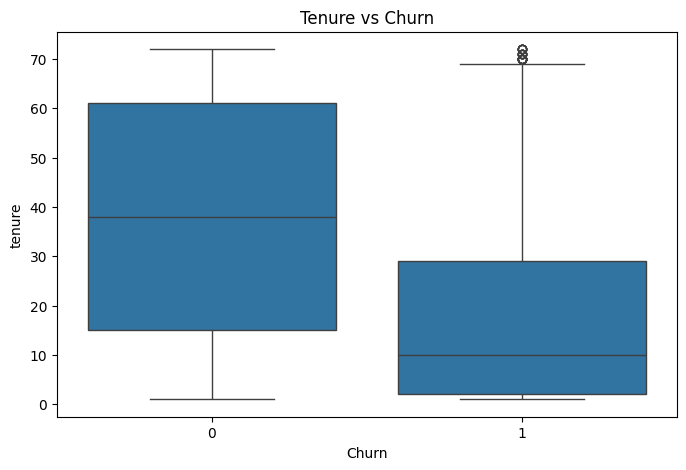

In [131]:
# Boxplot to compare the distribution of tenure between churned and non-churned customers
plt.figure(figsize=(8, 5))

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")

# Display the plot
plt.show()

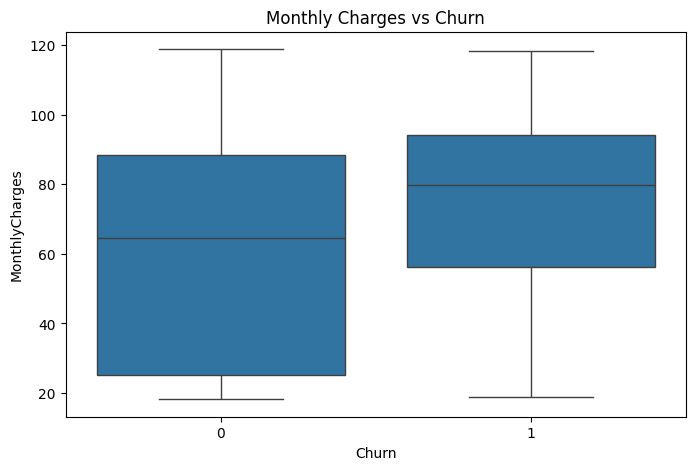

In [132]:
# Boxplot to analyze how monthly charges differ between churned and non-churned customers
plt.figure(figsize=(8, 5))

sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")

# Display the plot
plt.show()

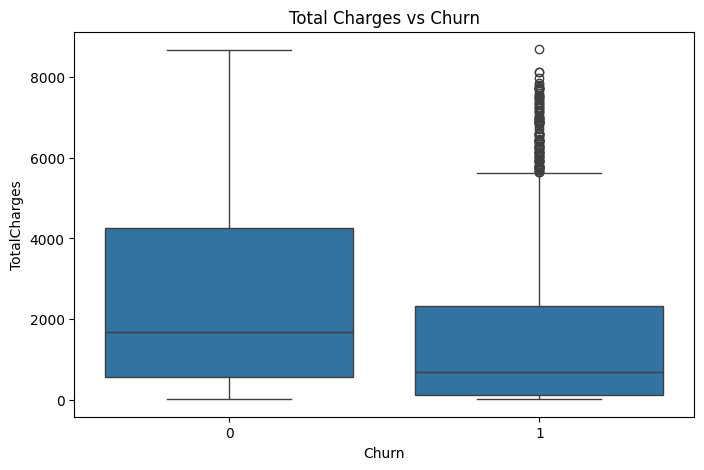

In [133]:
# Boxplot to examine how total charges vary between customers who churned and those who did not
plt.figure(figsize=(8, 5))

sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")

# Display the plot
plt.show()

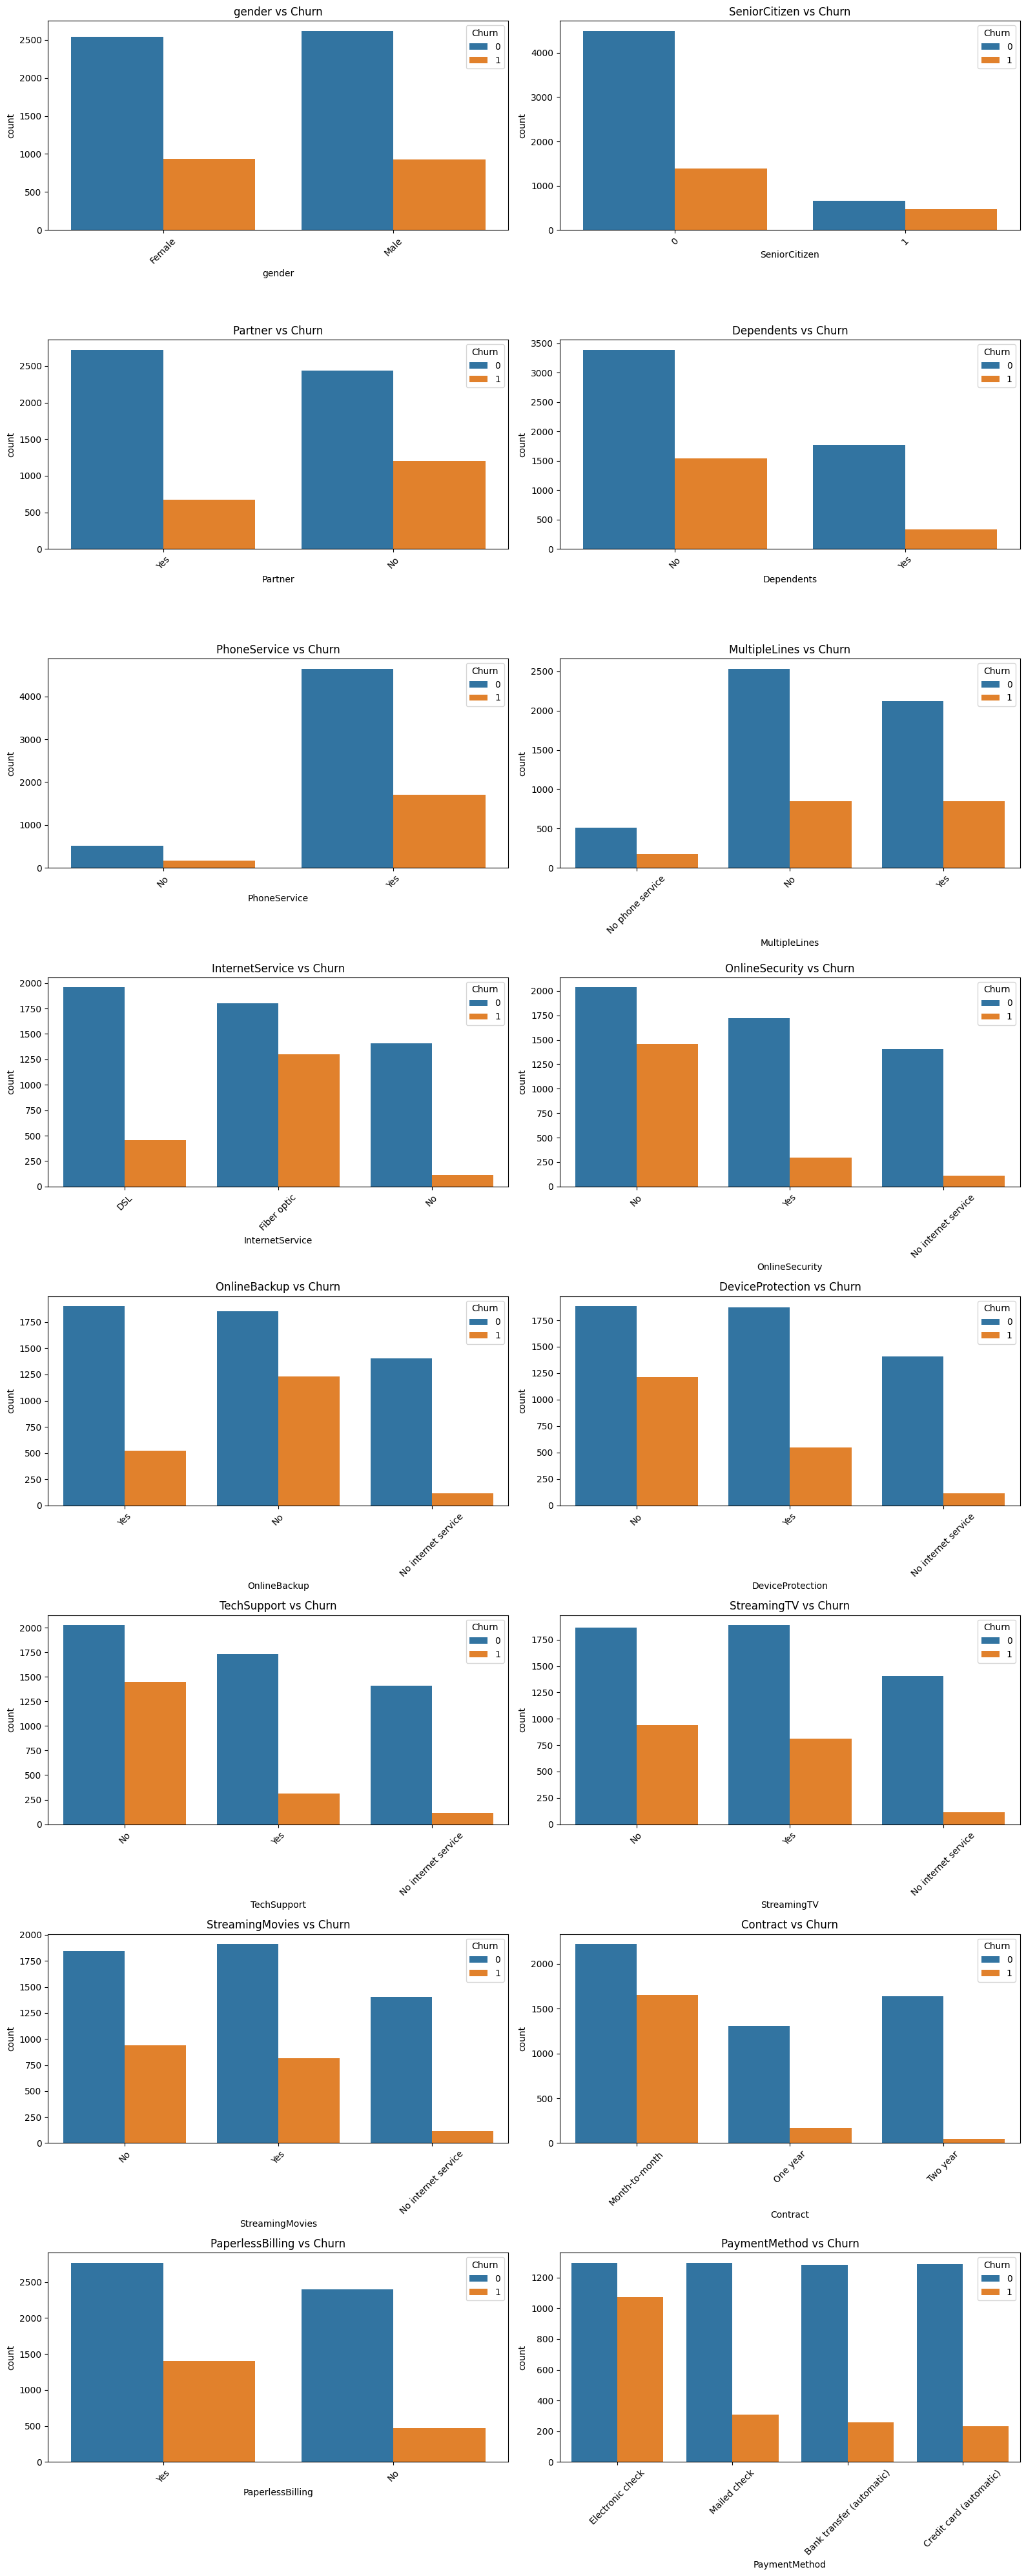

In [134]:
# Visualizing the relationship between each categorical feature and churn
# This helps identify which categories have higher churn rates.

plt.figure(figsize=(16, 40))

# Loop through each categorical column and plot its distribution split by churn status
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(8, 2, i)  # Create an 8x2 grid of subplots
    sns.countplot(data=df, x=col, hue="Churn")  # Hue shows churn vs non-churn
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Display all plots
plt.show()

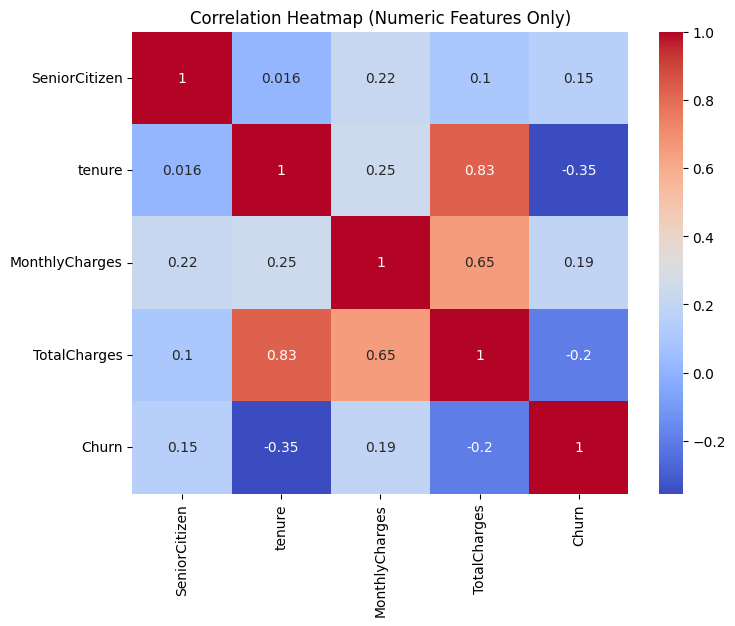

In [135]:
# Select only numeric columns for correlation analysis
# Correlation heatmaps require numerical data types
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))

# Plot a heatmap to visualize correlation between numerical features and churn
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap (Numeric Features Only)")

# Display the heatmap
plt.show()

In [136]:
#detect the outliers
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
def find_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)   # 25th percentile
    Q3 = df[column].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                    # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get rows where outliers exist
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in '{column}': {len(outliers)}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    return outliers

In [137]:
for col in numeric_cols:
    print("\n" + "="*50)
    find_outliers_iqr(col)


Outliers in 'tenure': 0
Lower bound: -60.0, Upper bound: 124.0

Outliers in 'MonthlyCharges': 0
Lower bound: -45.824999999999996, Upper bound: 171.27499999999998

Outliers in 'TotalCharges': 0
Lower bound: -4688.481250000001, Upper bound: 8884.66875


In [138]:
# Separate the dataset into features (X) and target variable (y)

# X contains all input features except the target column 'Churn'
X = df.drop("Churn", axis=1)

# y contains only the target variable 'Churn' (0 = No churn, 1 = Yes churn)
y = df["Churn"]

In [139]:
# Convert all categorical variables in X into numerical format using One-Hot Encoding.
# get_dummies() creates binary columns for each category.
# drop_first=True avoids multicollinearity by removing one dummy from each category group.

X = pd.get_dummies(X, drop_first=True)

# Display the first few rows to confirm that all categorical features
# have been successfully transformed into numeric dummy variables.
X.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0015-UOCOJ  customerID_0016-QLJIS  customerID_0017-DINOC  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0017-IUDMW  customerID_0018-NYROU  customerID_0019-EFAEP  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0019-GFNTW  customerID_0020-INWCK  customerID_0020-JDNXP  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0021-IKXGC  customerID_0022-TCJCI  customerID_0023-HGHWL  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0023-UYUPN  customerID_0023-XUOPT  customerID_0027-KWYKW  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0030-FNXPP  customerID_0031-PVLZI  customerID_0032-PGELS  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False       

In [140]:
# Standardize the feature set to ensure all numerical values are on a similar scale.
# This is important for algorithms like Neural Networks, which are sensitive to feature magnitude.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the entire feature set (X) and transform it.
# This converts all features to a standard normal distribution (mean=0, std=1).
X_scaled = scaler.fit_transform(X)

In [141]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# =============================================================
# 1. APPLY SMOTE ON FULL DATASET (NOT RECOMMENDED BUT YOU ASKED)
# =============================================================
sm = SMOTE(random_state=42)

# This will produce the balanced full dataset
X_bal, y_bal = sm.fit_resample(X, y)

print("Original class distribution:")
print(y.value_counts())

print("\nBalanced distribution after SMOTE:")
print(y_bal.value_counts())

# =============================================================
# 2. NOW SPLIT THE SMOTE-BALANCED DATA
# =============================================================
X_train_bal, X_test, y_train_bal, y_test = train_test_split(
    X_bal, y_bal,
    test_size=0.2,
    random_state=42,
    stratify=y_bal   # stratify the balanced dataset
)

print("\nTraining set distribution:")
print(y_train_bal.value_counts())

print("\nTest set distribution:")
print(y_test.value_counts())

Original class distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64

Balanced distribution after SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64

Training set distribution:
Churn
0    4130
1    4130
Name: count, dtype: int64

Test set distribution:
Churn
0    1033
1    1033
Name: count, dtype: int64


In [142]:
# Initialize the Neural Network (Multi-Layer Perceptron) classifier.
# hidden_layer_sizes=(64, 32) creates two hidden layers with 64 and 32 neurons.
# 'relu' activation works well for non-linear relationships.
# 'adam' is an efficient optimizer used for training neural networks.
# max_iter=300 limits training to 300 epochs to ensure convergence.

nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Train the Neural Network using the SMOTE-balanced training data.
nn.fit(X_train_bal, y_train_bal)

# Make predictions on the test set using the trained Neural Network model
y_pred_nn = nn.predict(X_test)

# Evaluate model performance using accuracy and a detailed classification report
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

# Generate and visualize the confusion matrix to analyze prediction results
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Display the heatmap
plt.show()

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

Neural Network Accuracy: 0.9172313649564375
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1033
           1       0.95      0.88      0.91      1033

    accuracy                           0.92      2066
   macro avg       0.92      0.92      0.92      2066
weighted avg       0.92      0.92      0.92      2066



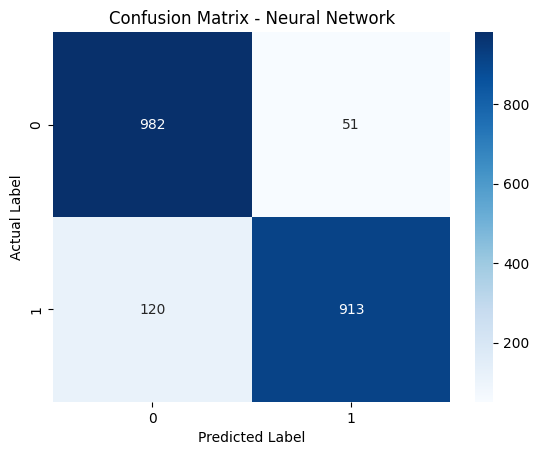

In [144]:
#overfitting check(nn)
train_pred_nn = nn.predict(X_train_bal)
test_pred_nn = nn.predict(X_test)

print("NN Training Accuracy:", accuracy_score(y_train_bal, train_pred_nn))
print("NN Test Accuracy:", accuracy_score(y_test, test_pred_nn))

NN Training Accuracy: 0.9639225181598063
NN Test Accuracy: 0.9172313649564375


In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# ------------------------------------------------------------
# ULTRA SMALL TUNING GRID (Very Fast)
# ------------------------------------------------------------
nn_param_grid = {
    'hidden_layer_sizes': [
        (64,),       # small model
        (64, 32)     # your default
    ],
    'alpha': [0.0001]  # fixed (best value)
}

# Base model with small max_iter (VERY FAST)
nn_model = MLPClassifier(
    activation='relu',
    solver='adam',
    max_iter=150,   # reduced for speed
    random_state=42
)

# Fast grid search (CV = 2)
nn_grid = GridSearchCV(
    estimator=nn_model,
    param_grid=nn_param_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1
)

print("Running ULTRA-FAST NN tuning...")

nn_grid.fit(X_train_bal, y_train_bal)

# Best parameters
print("Best NN Parameters:", nn_grid.best_params_)

# Best tuned model
best_nn = nn_grid.best_estimator_

# Predict on test data
y_pred_best_nn = best_nn.predict(X_test)

print("\nTUNED Neural Network Accuracy:", accuracy_score(y_test, y_pred_best_nn))
print(classification_report(y_test, y_pred_best_nn))

Running ULTRA-FAST NN tuning...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Best NN Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (64,)}

TUNED Neural Network Accuracy: 0.9448209099709584
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1033
           1       0.95      0.94      0.94      1033

    accuracy                           0.94      2066
   macro avg       0.94      0.94      0.94      2066
weighted avg       0.94      0.94      0.94      2066



NN MODEL COMPARISON
      Metric  Default NN  Tuned NN
0   Accuracy    0.917231  0.944821
1  Precision    0.947095  0.948293
2     Recall    0.883833  0.940949
3   F1-score    0.914372  0.944606


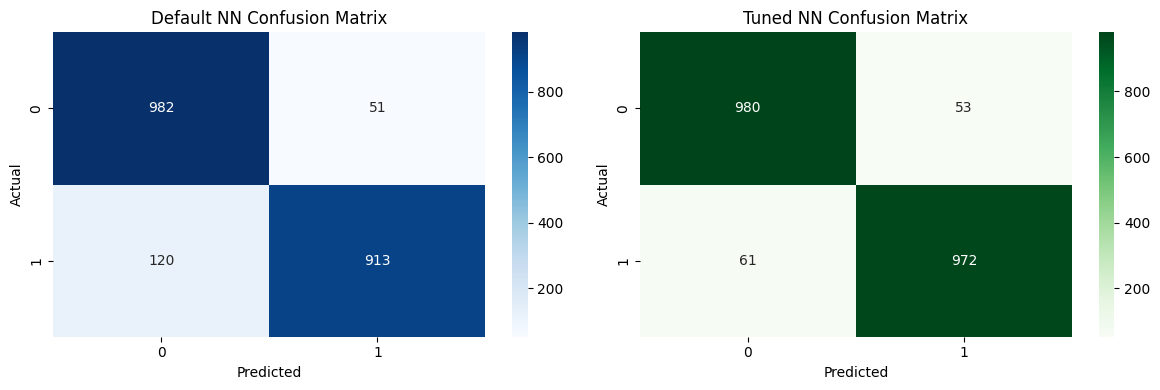

In [156]:

# NEURAL NETWORK MODEL COMPARISON (DEFAULT vs TUNED)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#DEFAULT MODEL METRICS
default_accuracy = accuracy_score(y_test, y_pred_nn)
default_precision = precision_score(y_test, y_pred_nn)
default_recall = recall_score(y_test, y_pred_nn)
default_f1 = f1_score(y_test, y_pred_nn)

#TUNED MODEL METRICS
tuned_accuracy = accuracy_score(y_test, y_pred_best_nn)
tuned_precision = precision_score(y_test, y_pred_best_nn)
tuned_recall = recall_score(y_test, y_pred_best_nn)
tuned_f1 = f1_score(y_test, y_pred_best_nn)

#Create comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Default NN': [default_accuracy, default_precision, default_recall, default_f1],
    'Tuned NN': [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1]
})

print("NN MODEL COMPARISON")
print(comparison_df)




fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Default NN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d",
            cmap="Blues", ax=axes[0])
axes[0].set_title("Default NN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Tuned NN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best_nn), annot=True, fmt="d",
            cmap="Greens", ax=axes[1])
axes[1].set_title("Tuned NN Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Decision Tree Accuracy: 0.8422071636011617
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.84      0.85      0.84      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



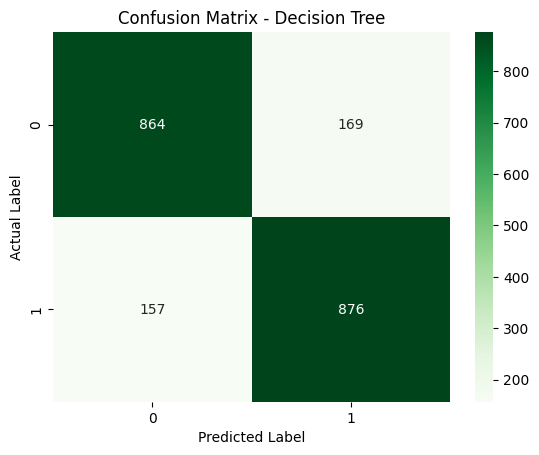

In [157]:
# Initialize the Decision Tree classifier.
# max_depth=None allows the tree to grow fully, capturing complex patterns.
# random_state=42 ensures reproducibility of results.

dt = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the Decision Tree model using the SMOTE-balanced training data.
dt.fit(X_train_bal, y_train_bal)

# Make predictions on the test dataset
y_pred_dt = dt.predict(X_test)

# Evaluate model performance using accuracy and classification metrics
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Generate and visualize the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Display the heatmap
plt.show()

In [158]:
# Train default DT again
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Predictions for overfitting check
train_pred = dt.predict(X_train_bal)
test_pred = dt.predict(X_test)

print("DT Training Accuracy:", accuracy_score(y_train_bal, train_pred))
print("DT Test Accuracy:", accuracy_score(y_test, test_pred))

DT Training Accuracy: 1.0
DT Test Accuracy: 0.8422071636011617


In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# VERY FAST tuning grid (only essential parameters)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Base DT model
dt_model = DecisionTreeClassifier(random_state=42)

# Fast GridSearch
dt_grid = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=2,                 # lower cv = faster
    scoring='accuracy',
    n_jobs=-1
)

print("Running FAST Decision Tree tuning...")

# Fit using SMOTE-balanced training data
dt_grid.fit(X_train_bal, y_train_bal)

# Show best parameters
print("Best Decision Tree Parameters:", dt_grid.best_params_)

# Best model
best_dt = dt_grid.best_estimator_

# Predictions
y_pred_dt_tuned = best_dt.predict(X_test)

# Results
print("\nTuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print(classification_report(y_test, y_pred_dt_tuned))

Running FAST Decision Tree tuning...
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Decision Tree Accuracy: 0.8451113262342691
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.84      0.85      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



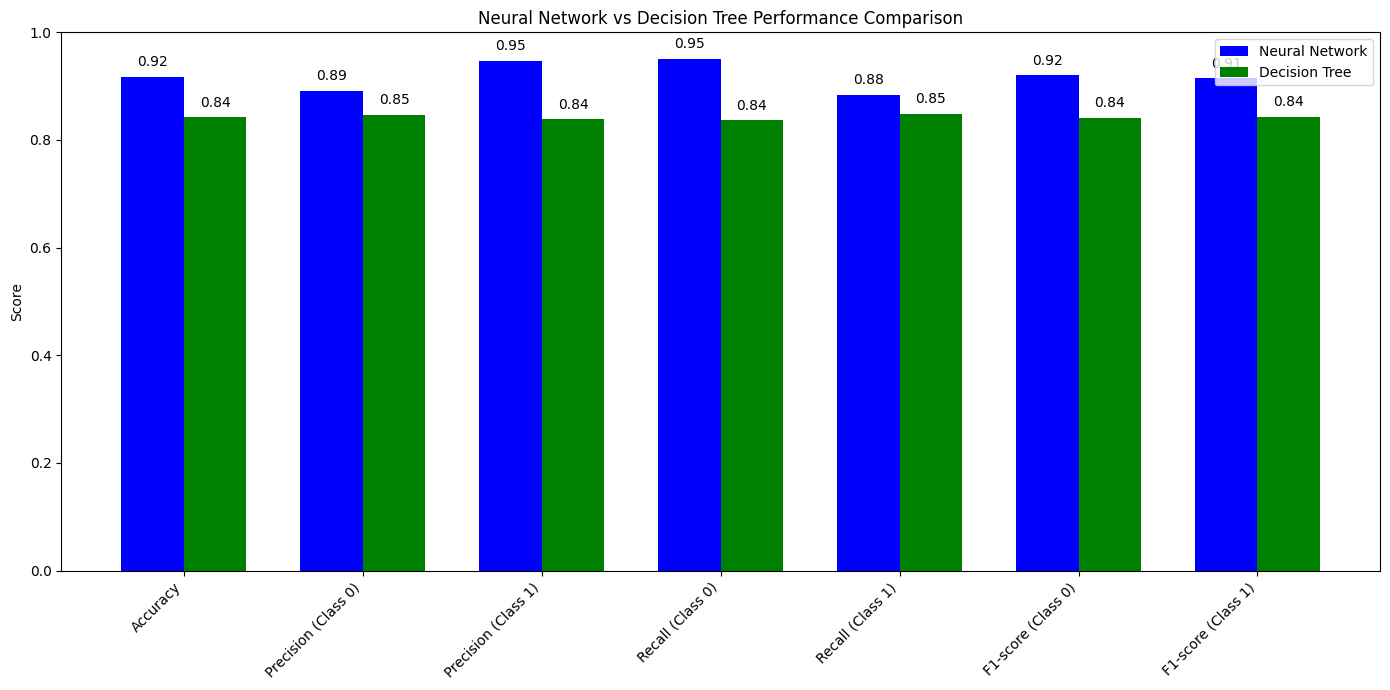

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
#calculate all metrics for nn
nn_acc = accuracy_score(y_test, y_pred_nn)
nn_prec_0 = precision_score(y_test, y_pred_nn, pos_label=0)
nn_prec_1 = precision_score(y_test, y_pred_nn, pos_label=1)

nn_rec_0 = recall_score(y_test, y_pred_nn, pos_label=0)
nn_rec_1 = recall_score(y_test, y_pred_nn, pos_label=1)

nn_f1_0 = f1_score(y_test, y_pred_nn, pos_label=0)
nn_f1_1 = f1_score(y_test, y_pred_nn, pos_label=1)

#calculate all metrics for dt
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec_0 = precision_score(y_test, y_pred_dt, pos_label=0)
dt_prec_1 = precision_score(y_test, y_pred_dt, pos_label=1)

dt_rec_0 = recall_score(y_test, y_pred_dt, pos_label=0)
dt_rec_1 = recall_score(y_test, y_pred_dt, pos_label=1)

dt_f1_0 = f1_score(y_test, y_pred_dt, pos_label=0)
dt_f1_1 = f1_score(y_test, y_pred_dt, pos_label=1)

#organize metrics for plotting
categories = [
    "Accuracy",
    "Precision (Class 0)", "Precision (Class 1)",
    "Recall (Class 0)", "Recall (Class 1)",
    "F1-score (Class 0)", "F1-score (Class 1)"
]

nn_scores = [nn_acc, nn_prec_0, nn_prec_1, nn_rec_0, nn_rec_1, nn_f1_0, nn_f1_1]
dt_scores = [dt_acc, dt_prec_0, dt_prec_1, dt_rec_0, dt_rec_1, dt_f1_0, dt_f1_1]

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(14, 7))

# Bars
plt.bar(x - width/2, nn_scores, width, label='Neural Network', color='blue')
plt.bar(x + width/2, dt_scores, width, label='Decision Tree', color='green')

# Labels
plt.xticks(x, categories, rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Neural Network vs Decision Tree Performance Comparison")
plt.ylim(0, 1)
plt.legend()

# Add values on top of bars
for i, v in enumerate(nn_scores):
    plt.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center')

for i, v in enumerate(dt_scores):
    plt.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()